# DRUGS CLASSIFICATION DATASET
### The dataset contains columns such as age, sex, BP, cholesterol, Na_to_K (refers to the "sodium to potassium ratio" in a human's blood) which are the factors used as features in this machine learning model to predict drug responses as the target is the drug used. Based on these factors, we can predict which type of drug is used by the user using classification models. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

## Import data

In [2]:
df = pd.read_csv("E:\DataScience\ML\ML_Project_3(on_classification)\Drugs_dataset.csv")
data = pd.DataFrame(df)
print(data.to_string())

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
5     22   F  NORMAL        HIGH    8.607  drugX
6     49   F  NORMAL        HIGH   16.275  DrugY
7     41   M     LOW        HIGH   11.037  drugC
8     60   M  NORMAL        HIGH   15.171  DrugY
9     43   M     LOW      NORMAL   19.368  DrugY
10    47   F     LOW        HIGH   11.767  drugC
11    34   F    HIGH      NORMAL   19.199  DrugY
12    43   M     LOW        HIGH   15.376  DrugY
13    74   F     LOW        HIGH   20.942  DrugY
14    50   F  NORMAL        HIGH   12.703  drugX
15    16   F    HIGH      NORMAL   15.516  DrugY
16    69   M     LOW      NORMAL   11.455  drugX
17    43   M    HIGH        HIGH   13.972  drugA
18    23   M     LOW        HIGH    7.298  drugC
19    32   F    HIGH

## Basic Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Data Cleaning

### Check Null Values

In [4]:
print(data.isna().sum()) 

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


### Check Duplicates

In [5]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  0


### Encoding Categorial Data

In [6]:
categ_col = data.select_dtypes(include=['object']).columns

# Initialize encoders
label_encoder = LabelEncoder()

# Encode each categorical column using Label Encoding for simplicity
encoded_data = data.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(data[i])

# Display the first 5 rows of the encoded dataset
print(encoded_data)

     Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    0   0            0   25.355     0
1     47    1   1            0   13.093     3
2     47    1   1            0   10.114     3
3     28    0   2            0    7.798     4
4     61    0   1            0   18.043     0
..   ...  ...  ..          ...      ...   ...
195   56    0   1            0   11.567     3
196   16    1   1            0   12.006     3
197   52    1   2            0    9.894     4
198   23    1   2            1   14.020     4
199   40    0   1            1   11.349     4

[200 rows x 6 columns]


### Check Outliers

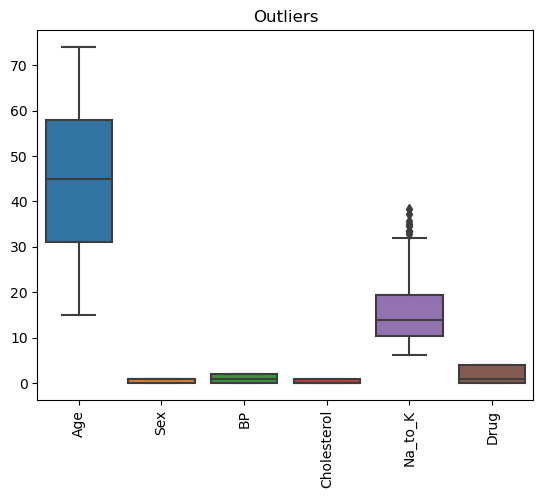

In [7]:
# plotting boxplot

sns.boxplot(data = encoded_data)
plt.title("Outliers")
plt.xticks(rotation = 90)
plt.show()

## Statistical Analysis

In [8]:
print(encoded_data.describe())

              Age         Sex          BP  Cholesterol     Na_to_K        Drug
count  200.000000  200.000000  200.000000   200.000000  200.000000  200.000000
mean    44.315000    0.520000    0.910000     0.485000   16.084485    1.595000
std     16.544315    0.500854    0.821752     0.501029    7.223956    1.716305
min     15.000000    0.000000    0.000000     0.000000    6.269000    0.000000
25%     31.000000    0.000000    0.000000     0.000000   10.445500    0.000000
50%     45.000000    1.000000    1.000000     0.000000   13.936500    1.000000
75%     58.000000    1.000000    2.000000     1.000000   19.380000    4.000000
max     74.000000    1.000000    2.000000     1.000000   38.247000    4.000000


### Correlation

               Age    Sex     BP  Cholesterol  Na_to_K   Drug
Age          1.000  0.102  0.054       -0.068   -0.063  0.042
Sex          0.102  1.000 -0.008       -0.009   -0.125  0.018
BP           0.054 -0.008  1.000       -0.138   -0.149  0.419
Cholesterol -0.068 -0.009 -0.138        1.000    0.010  0.048
Na_to_K     -0.063 -0.125 -0.149        0.010    1.000 -0.689
Drug         0.042  0.018  0.419        0.048   -0.689  1.000


<Axes: >

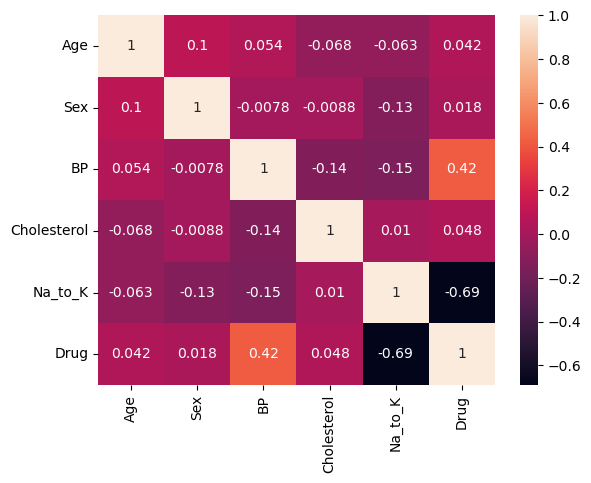

In [9]:
corre = encoded_data.corr(numeric_only=True)
print(np.around(corre, decimals = 3))

# plot
sns.heatmap(corre, annot = True)

### Covariance

                 Age    Sex     BP  Cholesterol  Na_to_K   Drug
Age          273.714  0.845  0.737       -0.566   -7.544  1.189
Sex            0.845  0.251 -0.003       -0.002   -0.452  0.016
BP             0.737 -0.003  0.675       -0.057   -0.886  0.592
Cholesterol   -0.566 -0.002 -0.057        0.251    0.036  0.042
Na_to_K       -7.544 -0.452 -0.886        0.036   52.186 -8.543
Drug           1.189  0.016  0.592        0.042   -8.543  2.946


<Axes: >

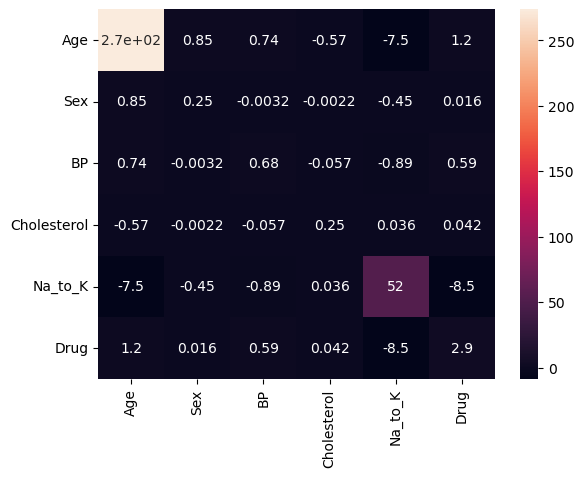

In [10]:
cova = encoded_data.cov(numeric_only=True)
print(np.around(cova, decimals = 3))

# plot
sns.heatmap(cova, annot = True)

### Extract Dependent and Independent Variables

In [11]:
X = encoded_data.iloc[:,0:5]   # independent variable
Y = encoded_data['Drug']       # dependent variable

## Split Train and Test Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## Build Model

### Plotting Graph

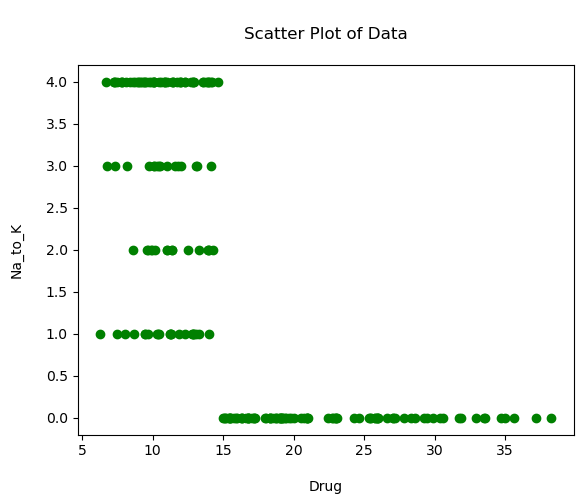

In [13]:
# scatter plot
plt.scatter(data['Na_to_K'], Y, color = "g")
plt.xlabel("\nDrug")
plt.ylabel("Na_to_K\n")
plt.title("\nScatter Plot of Data\n")
plt.show()


### Using Logistic Regression

In [14]:
# Fitting the Logistic Regression model to the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Comparing the actual output values for X_test with the predicted values
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(data)

     Actual  Predicted
95        4          4
15        0          0
30        4          4
158       3          4
128       0          0
115       0          0
69        0          0
170       4          4
174       1          1
45        4          4
66        1          1
182       4          4
165       0          0
78        1          0
186       2          2
177       0          0
56        2          2
152       4          4
82        3          4
68        0          0
124       2          2
16        4          4
148       4          4
93        0          0
65        0          0
60        0          0
84        3          4
67        4          4
125       0          0
132       4          4
9         0          0
18        3          4
55        3          0
75        0          0
150       1          1
104       0          0
135       4          4
137       1          0
164       0          0
76        1          0


c:\Users\junaidkh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Predicting Accuracy and Performance

In [15]:
# Predicting the accuracy score
score_lr = accuracy_score(y_test, y_pred) * 100
print("Accuracy score is ", score_lr, "%")

# Optionally, include detailed performance metrics:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy score is  80.0 %

Confusion Matrix:
[[15  0  0  0  0]
 [ 3  3  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  0  4]
 [ 0  0  0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.50      0.67         6
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         5
           4       0.73      1.00      0.85        11

    accuracy                           0.80        40
   macro avg       0.70      0.70      0.68        40
weighted avg       0.72      0.80      0.74        40



c:\Users\junaidkh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\junaidkh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\junaidkh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluating the Algorithm

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.25
Mean Squared Error: 0.4
Root Mean Squared Error: 0.6324555320336759


### Boosting

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

gb = GradientBoostingClassifier(random_state = 42)
xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss', random_state = 42)

# Train the classifiers
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_predict_gb = gb.predict(X_test)
y_predict_xgb = xgb.predict(X_test)

# Evaluate the models
score_gb = accuracy_score(y_test, y_predict_gb) * 100
score_xgb = accuracy_score(y_test, y_predict_xgb) * 100

print(f"Gradient Boosting Classifier Accuracy: {score_gb:.2f}%")
print(f"XGBoost Classifier Accuracy: {score_xgb:.2f}%")

c:\Users\junaidkh\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:04:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Classifier Accuracy: 100.00%
XGBoost Classifier Accuracy: 97.50%


### Model Performance Comparison Graph

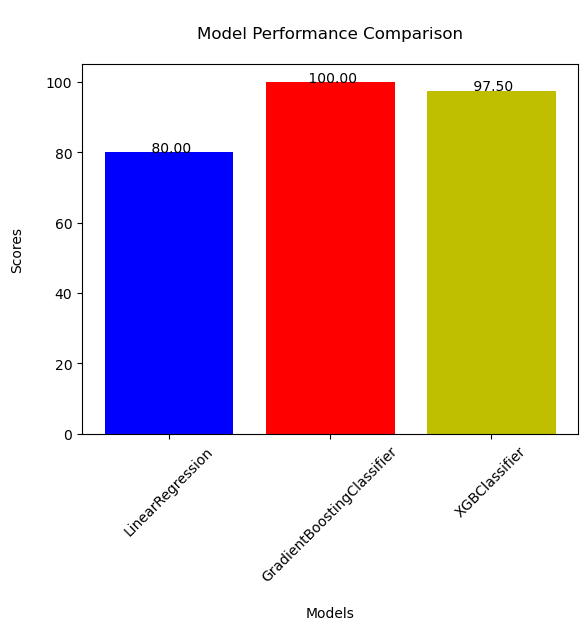

In [18]:
# bar plot
models = ['LinearRegression', 'GradientBoostingClassifier', 'XGBClassifier']
scores = [score_lr, score_gb, score_xgb]
plt.bar(models, scores, color = ['b','r','y'])
plt.title('\nModel Performance Comparison\n')
plt.xlabel('\nModels')
plt.ylabel('Scores\n')
plt.xticks(rotation = 45)
for i, score in enumerate(scores):
    plt.text(i, score+ 0.02, f'{score: 0.2f}', ha = 'center')
plt.show()

### The best performance is by the Gradient Boosting Classifier Model predicting an accuracy score of 100%.